<a href="https://colab.research.google.com/github/StoryChara/CoderBloom_CPCII/blob/main/2.%20Recursion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import unittest

# Recursion

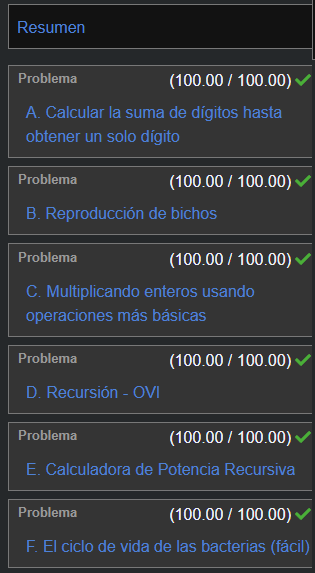

## Fibonacci

$F_n = F_{n-1} + F_{n-2} \quad \text{para } n > 1$

$F_n = 1 \quad \text{para } n = 1 $

$F_n = 0 \quad \text{para } n = 0 $

In [42]:
def fibonacci(n):
    if n <= 1: return n
    return fibonacci(n-1) + fibonacci(n-2)

print(f"fibonacci({5}) es: {fibonacci(5)}")

fibonacci(5) es: 5


## Factorial

$ n! = n \times (n-1) \times \cdots \times 1 $

In [43]:
def factorial(n):
    if n <= 0: return 1
    return n * factorial(n-1)

print(f"factorial({5}) es: {factorial(5)}")

factorial(5) es: 120


## A. Calcular la suma de dígitos hasta obtener un solo dígito

El programa recibe un número entero positivo y calcula la suma de sus dígitos de forma recursiva hasta que se obtenga un solo dígito. La función sumarDigitos utiliza recursión para descomponer el número y sumar sus dígitos repetidamente.

**Entrada**
Un único número entero positivo.

**Salida**
Un número entero, que es la suma de los dígitos del número original, reducida a un solo dígito.

**Ejemplo**

| **Entrada**      | **Salida** |
|------------------|------------|
| 9875             | 2          |


In [ ]:
def suma_digitos(n):
    suma = sum([int(x) for x in list(str(n))])

    if suma >= 10: return suma_digitos(suma)
    return suma

num = int(input())
print(suma_digitos(num))

9875
2


In [ ]:
class TestA(unittest.TestCase):
    def test_1(self):
        self.assertEqual(suma_digitos(9875), 2)

suite = unittest.TestLoader().loadTestsFromTestCase(TestA)
runner = unittest.TextTestRunner(verbosity=2)
result = runner.run(suite)

test_1 (__main__.TestA.test_1) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


## B. Reproducción de bichos

Acabas de descubrir una nueva especie de bicho y estás estudiando su reproducción (la cual es asexual, es decir, no necesitan parejas para tener bebés). Al final de cada día ocurre lo siguiente:

* Un bicho del tipo $A$ produce como bebés a un bicho de tipo $A$, tres bichos de tipo $B$ y un bicho de tipo $C$.
* Un bicho del tipo $B$ produce como bebés a dos bichos de tipo $B$ y dos bichos de tipo $C$.
* Un bicho del tipo $C$ produce como bebés a un bicho de tipo $A$ y cuatro bichos de tipo $C$.

Los bebés maduran rápido y sus propios bebés nacerán al siguiente día de haber nacido ellos. Por si fuera poco, los bichos que ya tenías nunca morirán y seguirán teniendo bebés cada día. Si comienzas con $N$ bichos de tipo $A$, ¿cuántos bichos tendrás en total después de $D$ días?

**Entrada**
Dos enteros $N, D$. Puedes suponer que $N, D \geq 0$.

Salida
Un entero que sea el número total de bichos tras $D$ días. Puedes suponer que el resultado cabe en un *int*.

**Ejemplo**

| **Entrada**      | **Salida** |
|------------------|------------|
| 1 0              | 1          |
| 1 1              | 6          |


In [39]:
def reproduccion(D, A, B, C):
    if D == 0: return A+B+C
    return reproduccion(D-1, A+(A*1)+(B*0)+(C*1), B+(A*3)+(B*2)+(C*0), C+(A*1)+(B*2)+(C*4))


N, D = input().split()
print(reproduccion(int(D), int(N), 0, 0))

1 0
1


In [40]:
class TestB(unittest.TestCase):
    def test_1(self):
        self.assertEqual(reproduccion(0, 1, 0, 0), 1)

    def test_2(self):
        self.assertEqual(reproduccion(1, 1, 0, 0), 6)

suite = unittest.TestLoader().loadTestsFromTestCase(TestB)
runner = unittest.TextTestRunner(verbosity=2)
result = runner.run(suite)

test_1 (__main__.TestB.test_1) ... ok
test_2 (__main__.TestB.test_2) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.005s

OK


## C. Multiplicando enteros usando operaciones más básicas

Compraste una computadora muy antigua en una venta de garage para coleccionarla. El CPU de esta computadora tiene bastantes limitaciones: aunque puede sumar números arbitrarios, no puede multiplicar ni dividir números arbitrarios; sólo puede multiplicar por 2 y dividir entre 2 (todo con enteros). Por ejemplo, el CPU puede calcular $5 + 7$, $5 \times 2$, $5 \mathbin{/} 2$ pero no puede calcular $5 \times 7$. Como eres todo un experto programando, diseñaste un algoritmo recursivo $\textrm{producto}(a, b)$ que sirve para multiplicar $a \times b$ y que sólo necesita las operaciones que sí están disponibles:

* Si $a=0$ entonces $\textrm{producto}(a, b) = 0$.
* Si $a > 0$ y $a$ es par, entonces $\textrm{producto}(a, b) = 2 \times  \textrm{producto} (a \mathbin{/} 2, b)$.
* Si $a > 0$ y  $a$ es impar, entonces $\textrm{producto}(a, b) = 2 \times \textrm{producto}(a \mathbin{/} 2, b) + b$.

Escribe un programa que calcule cuántas operaciones aritméticas (sumas, multiplicaciones por 2, divisiones entre 2) necesitará el algoritmo anterior para calcular el producto de dos números. En el CPU en cuestión, la detección de la paridad de $a$ es gratuita y no debes contarla.

**Entrada**
Dos enteros $a,b$. Puedes suponer que $0 \leq a, b \leq 10^6$.

**Salida**
Un entero que sea la cantidad de operaciones aritméticas que se ejecutaron.

Ejemplo

| **Entrada**      | **Salida** |
|------------------|------------|
| 0 5              | 0          |
| 5 0              | 8          |
| 5 7              | 8          |
| 1337 84          | 28         |


In [62]:
def producto(a, b):
    if a==0: return 0
    if a%2==0: return producto(a/2,b) + 2
    return producto(a//2, b) + 3

a, b = input().split()
print(producto(int(a), int(b)))

1337 84
28


In [63]:
class TestC(unittest.TestCase):
    def test_1(self):
        self.assertEqual(producto(0, 5), 0)

    def test_2(self):
        self.assertEqual(producto(5, 0), 8)

    def test_3(self):
        self.assertEqual(producto(5, 7), 8)

    def test_4(self):
        self.assertEqual(producto(1337, 84), 28)

suite = unittest.TestLoader().loadTestsFromTestCase(TestC)
runner = unittest.TextTestRunner(verbosity=2)
result = runner.run(suite)

test_1 (__main__.TestC.test_1) ... ok
test_2 (__main__.TestC.test_2) ... ok
test_3 (__main__.TestC.test_3) ... ok
test_4 (__main__.TestC.test_4) ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.013s

OK


## D. Recursión - OVI

Se quiere que escribas un programa que sea capaz de calcular la siguiente fórmula recursiva:

$ f(0) = 1 $

$ f(1) = 1 $

$ f(n) = f(n-1) + 2 * f(n-2) $

**Entrada**
Un número $n$, indicando que se quiere que calcules el n-ésimo número de la secuencia $0 \leq n \leq 20$.

**Salida**
Imprime el valor de $f(n)$

**Ejemplos**

| **Entrada**      | **Salida** |
|------------------|------------|
| 0                | 1          |
| 1                | 1          |
| 2                | 3          |
| 6                | 43         |

In [56]:
def OVI(n):
    if n <= 1: return 1
    return OVI(n-1) + 2*OVI(n-2)

n = int(input())
print(OVI(n))

0
1


In [57]:
class TestD(unittest.TestCase):
    def test_1(self):
        self.assertEqual(OVI(0), 1)

    def test_2(self):
        self.assertEqual(OVI(1), 1)

    def test_3(self):
        self.assertEqual(OVI(2), 3)

    def test_4(self):
        self.assertEqual(OVI(6), 43)

suite = unittest.TestLoader().loadTestsFromTestCase(TestD)
runner = unittest.TextTestRunner(verbosity=2)
result = runner.run(suite)

test_1 (__main__.TestD.test_1) ... ok
test_2 (__main__.TestD.test_2) ... ok
test_3 (__main__.TestD.test_3) ... ok
test_4 (__main__.TestD.test_4) ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.012s

OK


## E. Calculadora de Potencia Recursiva

Calcula la potencia de un número utilizando una función recursiva. Toma dos números como entrada: la base y el exponente. Luego, utiliza una función llamada potencia para calcular la potencia de la base elevada al exponente utilizando recursividad. Finalmente, imprime el resultado de la potencia.

**Entrada**
El programa espera dos valores enteros separados por espacios en la entrada estándar. El primer número es la base y el segundo número es el exponente.

**Salida**
El programa imprimirá un solo número entero, que es el resultado de elevar la base al exponente.

**Ejemplo**

| **Entrada**      | **Salida** |
|------------------|------------|
| 5 3              | 125        |
| 2 4              | 16         |


In [50]:
def potencia(base, exponente):
    if exponente==1: return base
    return base*potencia(base, exponente-1)

base, exponente = input().split()
print(potencia(int(base),int(exponente)))

5 3
125


In [51]:
class TestE(unittest.TestCase):
    def test_1(self):
        self.assertEqual(potencia(5, 3), 125)

    def test_2(self):
        self.assertEqual(potencia(2, 4), 16)

suite = unittest.TestLoader().loadTestsFromTestCase(TestE)
runner = unittest.TextTestRunner(verbosity=2)
result = runner.run(suite)

test_1 (__main__.TestE.test_1) ... ok
test_2 (__main__.TestE.test_2) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.005s

OK


## F. El ciclo de vida de las bacterias (fácil)

Estás estudiando cierto tipo de bacteria y acabas de darte cuenta que su ciclo de vida es bastante predecible. Exactamente $1$ día después de nacer, la bacteria produce dos descendientes. Sin embargo, la bacteria no vuelve a producir ningún descendiente después, aunque tampoco muere.

¿Cuántas bacterias vivas habrá después de $N$ días si comienzas tu experimento con una bacteria recién nacida?

**Entrada**
Un entero $N$. Puedes suponer que $0 \leq N \leq 20$.

**Salida**
Un entero que sea la cantidad de bacterias vivas que habrá después de $N$ días.

**Ejemplo**

| **Entrada**      | **Salida** |
|------------------|------------|
| 0                | 1          |
| 5                | 63         |


In [46]:
def ciclo_bacterias(dias, bacterias):
    if dias==0: return bacterias
    return ciclo_bacterias(dias-1, bacterias*2+1)

dias = int(input())
print(ciclo_bacterias(dias, 1))

5
63


In [47]:
class TestF(unittest.TestCase):
    def test_1(self):
        self.assertEqual(ciclo_bacterias(0, 1), 1)

    def test_2(self):
        self.assertEqual(ciclo_bacterias(5, 1), 63)

suite = unittest.TestLoader().loadTestsFromTestCase(TestF)
runner = unittest.TextTestRunner(verbosity=2)
result = runner.run(suite)

test_1 (__main__.TestF.test_1) ... ok
test_2 (__main__.TestF.test_2) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.004s

OK
